c:\Users\sniks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sniks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sniks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sniks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

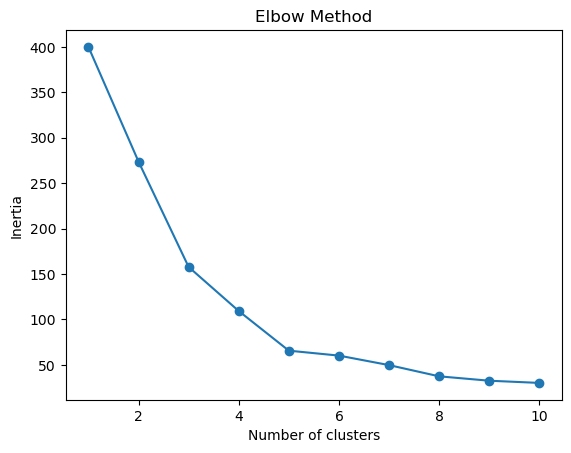

c:\Users\sniks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


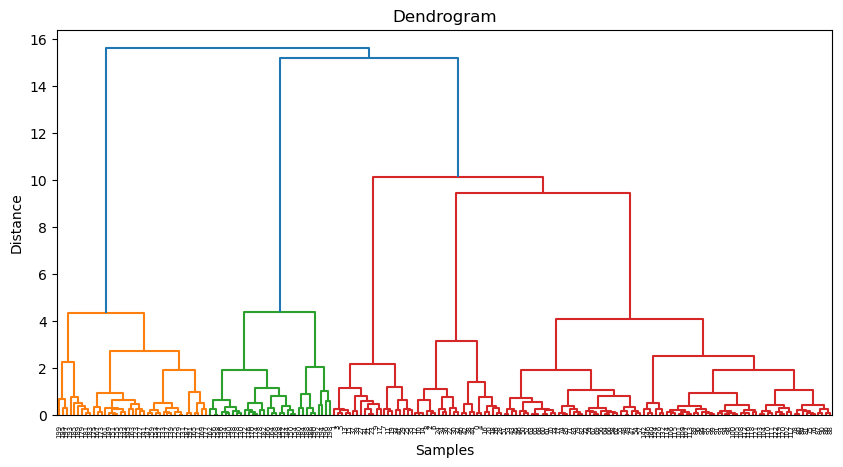

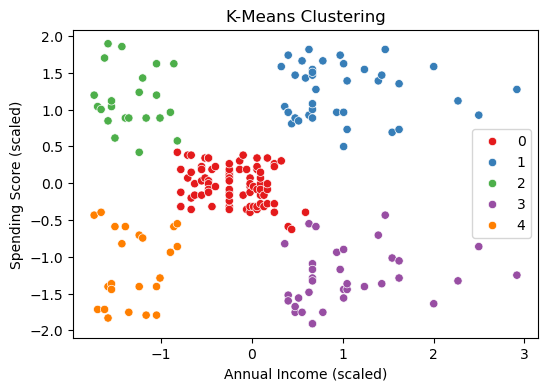

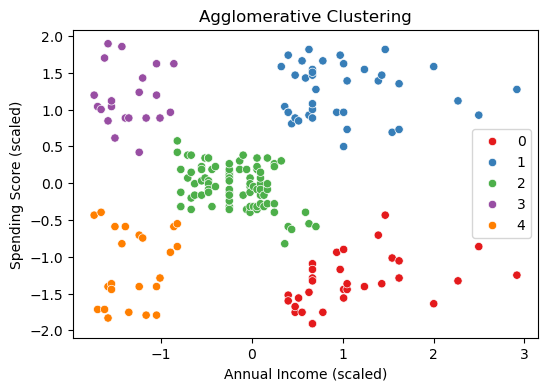

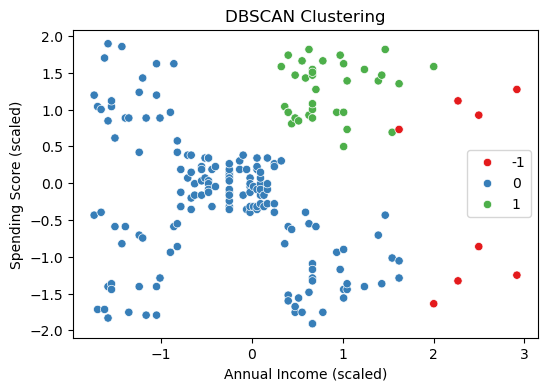

Silhouette Score (K-Means): 0.5546571631111091
Silhouette Score (Agglomerative): 0.5538089226688662
Silhouette Score (DBSCAN): 0.35044619989666004


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

df = pd.read_csv("C:\\Users\\sniks\\OneDrive\\Desktop\\ml assignment\\Mall_Customers.csv")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1')
    plt.title(title)
    plt.xlabel('Annual Income (scaled)')
    plt.ylabel('Spending Score (scaled)')
    plt.legend()
    plt.show()

plot_clusters(X_scaled, labels_kmeans, 'K-Means Clustering')
plot_clusters(X_scaled, labels_agglo, 'Agglomerative Clustering')
plot_clusters(X_scaled, labels_dbscan, 'DBSCAN Clustering')

print("Silhouette Score (K-Means):", silhouette_score(X_scaled, labels_kmeans))
print("Silhouette Score (Agglomerative):", silhouette_score(X_scaled, labels_agglo))
print("Silhouette Score (DBSCAN):", silhouette_score(X_scaled, labels_dbscan))
